# Insurance Claim Fraud Detection Analysis Project

***Problem Statement :***

Objective: Identify fraud patterns in insurance claims.

**General Instructions:**
*   Dataset: `insurance_claims.csv` (`claim_id`, `age`, `policy_type`, `claim_amount`, `fraudulent`)
*   Remove entries with claim_amount = 0.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('insurance_claims.csv')

print("\n=== Original Data ===")
df.head()


=== Original Data ===


,claim_id,age,policy_type,claim_amount,fraudulent
0,1001,23,auto,5800.0,0
1,1002,24,auto,12000.0,1
2,1003,19,auto,0.0,0
3,1004,67,auto,4800.0,0
4,1005,32,auto,7000.0,0


In [32]:
# Remove entries with claim_amount = 0
df = df[df['claim_amount'] != 0]

print("=== Data with Claim Amount > 0 ===")
df.head(10)

=== Data with Claim Amount > 0 ===


,claim_id,age,policy_type,claim_amount,fraudulent
0,1001,23,auto,5800.0,0
1,1002,24,auto,12000.0,1
3,1004,67,auto,4800.0,0
4,1005,32,auto,7000.0,0
5,1006,45,auto,15000.0,1
6,1007,21,auto,5100.0,0
7,1008,30,auto,6300.0,0
8,1009,22,auto,16000.0,1
10,1011,20,auto,3000.0,0
11,1012,72,auto,500.0,0


Q3: Impute missing claim_amount using mean. [CO3, BL3]

In [33]:
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean())

print("=== Cleaned Data ===")
df.head(10)

=== Cleaned Data ===


,claim_id,age,policy_type,claim_amount,fraudulent
0,1001,23,auto,5800.0,0
1,1002,24,auto,12000.0,1
3,1004,67,auto,4800.0,0
4,1005,32,auto,7000.0,0
5,1006,45,auto,15000.0,1
6,1007,21,auto,5100.0,0
7,1008,30,auto,6300.0,0
8,1009,22,auto,16000.0,1
10,1011,20,auto,3000.0,0
11,1012,72,auto,500.0,0


Q1: Compute fraud rate by policy_type. [CO1, BL3]

In [34]:
fraud_rate_policy = df.groupby('policy_type')['fraudulent'].mean()
print("*** Fraud Rate by Policy Type ***")
print(fraud_rate_policy)

*** Fraud Rate by Policy Type ***
policy_type
auto      0.343750
health    0.318841
home      0.552632
Name: fraudulent, dtype: float64


Q2: Group by age bracket to observe fraud tendencies. [CO2, BL4]

In [35]:
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['age_bracket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
fraud_rate_age = df.groupby('age_bracket')['fraudulent'].mean()
print("\n*** Fraud Rate by Age Bracket ***")
print(fraud_rate_age)


*** Fraud Rate by Age Bracket ***
age_bracket
18-29    0.421875
30-39    0.400000
40-49    0.318182
50-59    0.380952
60+      0.291667
Name: fraudulent, dtype: float64


/tmp/ipython-input-3095464293.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_age = df.groupby('age_bracket')['fraudulent'].mean()


Q4: Analyze high claim_amount vs fraudulent correlation. [CO4, BL4]

In [36]:
threshold = df['claim_amount'].quantile(0.75)
df['high_claim'] = (df['claim_amount'] > threshold).astype(int)
corr = df[['high_claim', 'fraudulent']].corr().loc['high_claim', 'fraudulent']
print("\n*** Correlation between High Claim Amount and Fraudulent ***")
print(corr)



*** Correlation between High Claim Amount and Fraudulent ***
0.7286618705859363


Q5: Plot fraud distribution with bar and box plots. [CO5, BL5]

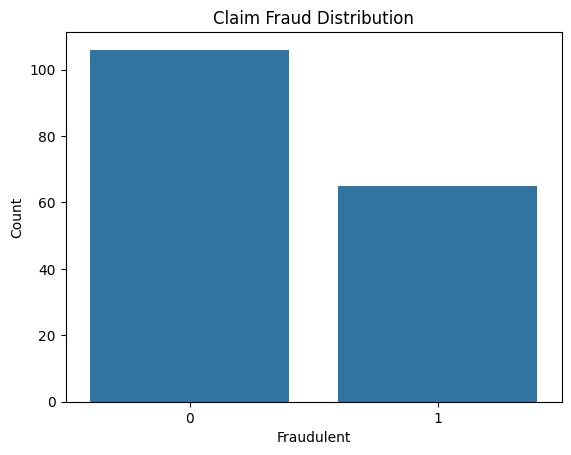

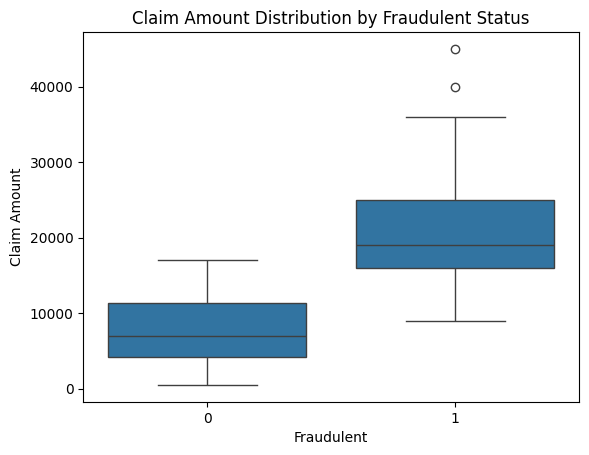

In [37]:
sns.countplot(x='fraudulent', data=df)
plt.title('Claim Fraud Distribution')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='fraudulent', y='claim_amount', data=df)
plt.title('Claim Amount Distribution by Fraudulent Status')
plt.xlabel('Fraudulent')
plt.ylabel('Claim Amount')
plt.show()
